In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

# library design specific tools
from ImageAnalysis3.library_tools import LibraryDesigner as ld
from ImageAnalysis3.library_tools import LibraryTools as lt
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML

37172


<a id='1'></a>
# 1 Extract region sequences

In [3]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\SingleRegionDNA'

In [5]:
print(pool_folder)

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\SingleRegionDNA


In [6]:
resolution = 0
flanking = 0
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'Muc_Gene_DNA')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
# folder for fasta sequences
sequence_folder = os.path.join(library_folder, 'sequences')
if not os.path.exists(sequence_folder):
    print(f"create sequence folder: {sequence_folder}")
    os.makedirs(sequence_folder)
# folder to save result probes
report_folder = os.path.join(library_folder, 'reports')
if not os.path.exists(report_folder):
    print(f"create report folder: {report_folder}")
    os.makedirs(report_folder)
    
print(f"-- library_folder: {library_folder}")
print(f"-- sequence_folder: {sequence_folder}")
print(f"-- report_folder: {report_folder}")

create library folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\SingleRegionDNA\Muc_Gene_DNA
create sequence folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\SingleRegionDNA\Muc_Gene_DNA\sequences
create report folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\SingleRegionDNA\Muc_Gene_DNA\reports
-- library_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\SingleRegionDNA\Muc_Gene_DNA
-- sequence_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\SingleRegionDNA\Muc_Gene_DNA\sequences
-- report_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\SingleRegionDNA\Muc_Gene_DNA\reports


## 0.2 get readouts

In [145]:
pool_folder

'\\\\10.245.74.212\\Chromatin_NAS_2\\Chromatin_Libraries\\SingleRegionDNA'

In [ ]:
readout_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts'


## 1.1 gene list

In [10]:
import pandas as pd

In [13]:
gene_df = pd.DataFrame(["MUC1","MUC4"], columns=['Gene'])

In [15]:
from ImageAnalysis3 import library_tools

In [16]:
# load gene reference
reload(library_tools.references)
reload(library_tools.sequences)

<module 'ImageAnalysis3.library_tools.sequences' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\library_tools\\sequences.py'>

In [24]:
ref_filename = os.path.join(reference_folder, 'Transcriptome', 'Homo_sapiens.GRCh38.106.gff3')
with library_tools.references.gff3_reader(ref_filename, auto_read=True, load_savefile=True) as ref_rd:
    ref_save_dict = ref_rd._save_to_file(overwrite=False)


- loading from save_file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\Transcriptome\Homo_sapiens.GRCh38.106.pkl
parsing all gene information
gene:ENSG00000223972
gene:ENSG00000227232
gene:ENSG00000278267
gene:ENSG00000243485
gene:ENSG00000284332
gene:ENSG00000237613
gene:ENSG00000268020
gene:ENSG00000240361
gene:ENSG00000186092
gene:ENSG00000238009
gene:ENSG00000239945
gene:ENSG00000233750
gene:ENSG00000268903
gene:ENSG00000269981
gene:ENSG00000239906
gene:ENSG00000241860
gene:ENSG00000222623
gene:ENSG00000241599
gene:ENSG00000279928
gene:ENSG00000279457
gene:ENSG00000273874
gene:ENSG00000228463
gene:ENSG00000286448
gene:ENSG00000236679
gene:ENSG00000236601
gene:ENSG00000237094
gene:ENSG00000269732
gene:ENSG00000284733
gene:ENSG00000233653
gene:ENSG00000250575
gene:ENSG00000278757
gene:ENSG00000230021
gene:ENSG00000235146
gene:ENSG00000225972
gene:ENSG00000225630
gene:ENSG00000237973
gene:ENSG00000278791
gene:ENSG00000229344
gene:ENSG00000240409
gene:ENSG0000

gene:ENSG00000158161
gene:ENSG00000238231
gene:ENSG00000240750
gene:ENSG00000228589
gene:ENSG00000228943
gene:ENSG00000289576
gene:ENSG00000214812
gene:ENSG00000253005
gene:ENSG00000169403
gene:ENSG00000126698
gene:ENSG00000130770
gene:ENSG00000270605
gene:ENSG00000271398
gene:ENSG00000130766
gene:ENSG00000130772
gene:ENSG00000204138
gene:ENSG00000206779
gene:ENSG00000229820
gene:ENSG00000221216
gene:ENSG00000180198
gene:ENSG00000242125
gene:ENSG00000274266
gene:ENSG00000200087
gene:ENSG00000231468
gene:ENSG00000279443
gene:ENSG00000180098
gene:ENSG00000197989
gene:ENSG00000221539
gene:ENSG00000278274
gene:ENSG00000273544
gene:ENSG00000280498
gene:ENSG00000274582
gene:ENSG00000120656
gene:ENSG00000188060
gene:ENSG00000229388
gene:ENSG00000270103
gene:ENSG00000274978
gene:ENSG00000162419
gene:ENSG00000252777
gene:ENSG00000289291
gene:ENSG00000198492
gene:ENSG00000116329
gene:ENSG00000233427
gene:ENSG00000199756
gene:ENSG00000159023
gene:ENSG00000225616
gene:ENSG00000206704
gene:ENSG0000

gene:ENSG00000116678
gene:ENSG00000237852
gene:ENSG00000224570
gene:ENSG00000285079
gene:ENSG00000239319
gene:ENSG00000184588
gene:ENSG00000227466
gene:ENSG00000223152
gene:ENSG00000118473
gene:ENSG00000264720
gene:ENSG00000248458
gene:ENSG00000152760
gene:ENSG00000172410
gene:ENSG00000152763
gene:ENSG00000231080
gene:ENSG00000198160
gene:ENSG00000289394
gene:ENSG00000116704
gene:ENSG00000203963
gene:ENSG00000252433
gene:ENSG00000275678
gene:ENSG00000162594
gene:ENSG00000253074
gene:ENSG00000252116
gene:ENSG00000228523
gene:ENSG00000081985
gene:ENSG00000142864
gene:ENSG00000223263
gene:ENSG00000235200
gene:ENSG00000207504
gene:ENSG00000238139
gene:ENSG00000242482
gene:ENSG00000232048
gene:ENSG00000116717
gene:ENSG00000172380
gene:ENSG00000238778
gene:ENSG00000232284
gene:ENSG00000235055
gene:ENSG00000162595
gene:ENSG00000228431
gene:ENSG00000116729
gene:ENSG00000234383
gene:ENSG00000221203
gene:ENSG00000229133
gene:ENSG00000225242
gene:ENSG00000237622
gene:ENSG00000229440
gene:ENSG0000

gene:ENSG00000284964
gene:ENSG00000275557
gene:ENSG00000206828
gene:ENSG00000284842
gene:ENSG00000234232
gene:ENSG00000275229
gene:ENSG00000226500
gene:ENSG00000150337
gene:ENSG00000203814
gene:ENSG00000233030
gene:ENSG00000183598
gene:ENSG00000270882
gene:ENSG00000203811
gene:ENSG00000288825
gene:ENSG00000220323
gene:ENSG00000261716
gene:ENSG00000288859
gene:ENSG00000203852
gene:ENSG00000270276
gene:ENSG00000264207
gene:ENSG00000184678
gene:ENSG00000184260
gene:ENSG00000184270
gene:ENSG00000178096
gene:ENSG00000159164
gene:ENSG00000143368
gene:ENSG00000014914
gene:ENSG00000264522
gene:ENSG00000285184
gene:ENSG00000223945
gene:ENSG00000136631
gene:ENSG00000023902
gene:ENSG00000285554
gene:ENSG00000266187
gene:ENSG00000143401
gene:ENSG00000222222
gene:ENSG00000276110
gene:ENSG00000118298
gene:ENSG00000117362
gene:ENSG00000118292
gene:ENSG00000289041
gene:ENSG00000159208
gene:ENSG00000266472
gene:ENSG00000117360
gene:ENSG00000163125
gene:ENSG00000143374
gene:ENSG00000283933
gene:ENSG0000

gene:ENSG00000230748
gene:ENSG00000162763
gene:ENSG00000237783
gene:ENSG00000236206
gene:ENSG00000143198
gene:ENSG00000143149
gene:ENSG00000206990
gene:ENSG00000230175
gene:ENSG00000225272
gene:ENSG00000215838
gene:ENSG00000273365
gene:ENSG00000143183
gene:ENSG00000224358
gene:ENSG00000230659
gene:ENSG00000143179
gene:ENSG00000236364
gene:ENSG00000283936
gene:ENSG00000271527
gene:ENSG00000226292
gene:ENSG00000207341
gene:ENSG00000188859
gene:ENSG00000203307
gene:ENSG00000230898
gene:ENSG00000215952
gene:ENSG00000229588
gene:ENSG00000215835
gene:ENSG00000225325
gene:ENSG00000230231
gene:ENSG00000234142
gene:ENSG00000238087
gene:ENSG00000215834
gene:ENSG00000234984
gene:ENSG00000232341
gene:ENSG00000232148
gene:ENSG00000232223
gene:ENSG00000143157
gene:ENSG00000152382
gene:ENSG00000225171
gene:ENSG00000143195
gene:ENSG00000143194
gene:ENSG00000200036
gene:ENSG00000227907
gene:ENSG00000143167
gene:ENSG00000198842
gene:ENSG00000213068
gene:ENSG00000231605
gene:ENSG00000272205
gene:ENSG0000

gene:ENSG00000269934
gene:ENSG00000270110
gene:ENSG00000286773
gene:ENSG00000287315
gene:ENSG00000270104
gene:ENSG00000154370
gene:ENSG00000270094
gene:ENSG00000284311
gene:ENSG00000231563
gene:ENSG00000162931
gene:ENSG00000168148
gene:ENSG00000181218
gene:ENSG00000230841
gene:ENSG00000196890
gene:ENSG00000266174
gene:ENSG00000181201
gene:ENSG00000279306
gene:ENSG00000168159
gene:ENSG00000215811
gene:ENSG00000202056
gene:ENSG00000251823
gene:ENSG00000199352
gene:ENSG00000201588
gene:ENSG00000199337
gene:ENSG00000200381
gene:ENSG00000199396
gene:ENSG00000200624
gene:ENSG00000202521
gene:ENSG00000200343
gene:ENSG00000201321
gene:ENSG00000199910
gene:ENSG00000199334
gene:ENSG00000199270
gene:ENSG00000202526
gene:ENSG00000201355
gene:ENSG00000201925
gene:ENSG00000202257
gene:ENSG00000200370
gene:ENSG00000212237
gene:ENSG00000183929
gene:ENSG00000206878
gene:ENSG00000234975
gene:ENSG00000116574
gene:ENSG00000271475
gene:ENSG00000271399
gene:ENSG00000282111
gene:ENSG00000229840
gene:ENSG0000

gene:ENSG00000234944
gene:ENSG00000229630
gene:ENSG00000263795
gene:ENSG00000165731
gene:ENSG00000273008
gene:ENSG00000169826
gene:ENSG00000198915
gene:ENSG00000224265
gene:ENSG00000285712
gene:ENSG00000221468
gene:ENSG00000150201
gene:ENSG00000169813
gene:ENSG00000221400
gene:ENSG00000230555
gene:ENSG00000243660
gene:ENSG00000252532
gene:ENSG00000236114
gene:ENSG00000196793
gene:ENSG00000287852
gene:ENSG00000232004
gene:ENSG00000198298
gene:ENSG00000223910
gene:ENSG00000237389
gene:ENSG00000238263
gene:ENSG00000169740
gene:ENSG00000226245
gene:ENSG00000230565
gene:ENSG00000228426
gene:ENSG00000271173
gene:ENSG00000224162
gene:ENSG00000223746
gene:ENSG00000234973
gene:ENSG00000226808
gene:ENSG00000226790
gene:ENSG00000236769
gene:ENSG00000233395
gene:ENSG00000227029
gene:ENSG00000237590
gene:ENSG00000229116
gene:ENSG00000277288
gene:ENSG00000287901
gene:ENSG00000107562
gene:ENSG00000214089
gene:ENSG00000270767
gene:ENSG00000287173
gene:ENSG00000234580
gene:ENSG00000224812
gene:ENSG0000

gene:ENSG00000107816
gene:ENSG00000186862
gene:ENSG00000107819
gene:ENSG00000273162
gene:ENSG00000107821
gene:ENSG00000288844
gene:ENSG00000236311
gene:ENSG00000107807
gene:ENSG00000237579
gene:ENSG00000270973
gene:ENSG00000138136
gene:ENSG00000227128
gene:ENSG00000229649
gene:ENSG00000289441
gene:ENSG00000222238
gene:ENSG00000225208
gene:ENSG00000230967
gene:ENSG00000166167
gene:ENSG00000222414
gene:ENSG00000166171
gene:ENSG00000166169
gene:ENSG00000263436
gene:ENSG00000283558
gene:ENSG00000107829
gene:ENSG00000222051
gene:ENSG00000286489
gene:ENSG00000224817
gene:ENSG00000107831
gene:ENSG00000107833
gene:ENSG00000198408
gene:ENSG00000226009
gene:ENSG00000120049
gene:ENSG00000120029
gene:ENSG00000274742
gene:ENSG00000222430
gene:ENSG00000166189
gene:ENSG00000224302
gene:ENSG00000229629
gene:ENSG00000198728
gene:ENSG00000148840
gene:ENSG00000166197
gene:ENSG00000119915
gene:ENSG00000107859
gene:ENSG00000107862
gene:ENSG00000077150
gene:ENSG00000059915
gene:ENSG00000107872
gene:ENSG0000

gene:ENSG00000175868
gene:ENSG00000253179
gene:ENSG00000110680
gene:ENSG00000250640
gene:ENSG00000188487
gene:ENSG00000253072
gene:ENSG00000254946
gene:ENSG00000254789
gene:ENSG00000254695
gene:ENSG00000254645
gene:ENSG00000286960
gene:ENSG00000289116
gene:ENSG00000254661
gene:ENSG00000110693
gene:ENSG00000284094
gene:ENSG00000254878
gene:ENSG00000213785
gene:ENSG00000241943
gene:ENSG00000110696
gene:ENSG00000166689
gene:ENSG00000199883
gene:ENSG00000244398
gene:ENSG00000184669
gene:ENSG00000110700
gene:ENSG00000272034
gene:ENSG00000201403
gene:ENSG00000011405
gene:ENSG00000201586
gene:ENSG00000240808
gene:ENSG00000213779
gene:ENSG00000070081
gene:ENSG00000197149
gene:ENSG00000285545
gene:ENSG00000188211
gene:ENSG00000187486
gene:ENSG00000260196
gene:ENSG00000006071
gene:ENSG00000255035
gene:ENSG00000287898
gene:ENSG00000006611
gene:ENSG00000188162
gene:ENSG00000254586
gene:ENSG00000255335
gene:ENSG00000129152
gene:ENSG00000129159
gene:ENSG00000129158
gene:ENSG00000255448
gene:ENSG0000

gene:ENSG00000230835
gene:ENSG00000229719
gene:ENSG00000283926
gene:ENSG00000284155
gene:ENSG00000110046
gene:ENSG00000274986
gene:ENSG00000274314
gene:ENSG00000068971
gene:ENSG00000149735
gene:ENSG00000168070
gene:ENSG00000168062
gene:ENSG00000213465
gene:ENSG00000273003
gene:ENSG00000278851
gene:ENSG00000270775
gene:ENSG00000110025
gene:ENSG00000168061
gene:ENSG00000168060
gene:ENSG00000146670
gene:ENSG00000162300
gene:ENSG00000187066
gene:ENSG00000149823
gene:ENSG00000254501
gene:ENSG00000149809
gene:ENSG00000174276
gene:ENSG00000255173
gene:ENSG00000278952
gene:ENSG00000149806
gene:ENSG00000162298
gene:ENSG00000149792
gene:ENSG00000284489
gene:ENSG00000254455
gene:ENSG00000222477
gene:ENSG00000255058
gene:ENSG00000204710
gene:ENSG00000255200
gene:ENSG00000254614
gene:ENSG00000014216
gene:ENSG00000197847
gene:ENSG00000287821
gene:ENSG00000014138
gene:ENSG00000285816
gene:ENSG00000287917
gene:ENSG00000149798
gene:ENSG00000133884
gene:ENSG00000289231
gene:ENSG00000173825
gene:ENSG0000

gene:ENSG00000203334
gene:ENSG00000255528
gene:ENSG00000201243
gene:ENSG00000200613
gene:ENSG00000264997
gene:ENSG00000255028
gene:ENSG00000185742
gene:ENSG00000254890
gene:ENSG00000254482
gene:ENSG00000254659
gene:ENSG00000289465
gene:ENSG00000137710
gene:ENSG00000254798
gene:ENSG00000287245
gene:ENSG00000224776
gene:ENSG00000270423
gene:ENSG00000255210
gene:ENSG00000149289
gene:ENSG00000254416
gene:ENSG00000137714
gene:ENSG00000137727
gene:ENSG00000233497
gene:ENSG00000255149
gene:ENSG00000287556
gene:ENSG00000200168
gene:ENSG00000271390
gene:ENSG00000271584
gene:ENSG00000287028
gene:ENSG00000239354
gene:ENSG00000270202
gene:ENSG00000150750
gene:ENSG00000196167
gene:ENSG00000214290
gene:ENSG00000288097
gene:ENSG00000264032
gene:ENSG00000110777
gene:ENSG00000253099
gene:ENSG00000255428
gene:ENSG00000255093
gene:ENSG00000137707
gene:ENSG00000286028
gene:ENSG00000207811
gene:ENSG00000207562
gene:ENSG00000254980
gene:ENSG00000183644
gene:ENSG00000204381
gene:ENSG00000170145
gene:ENSG0000

gene:ENSG00000134545
gene:ENSG00000180574
gene:ENSG00000257016
gene:ENSG00000256039
gene:ENSG00000256667
gene:ENSG00000111196
gene:ENSG00000060140
gene:ENSG00000060138
gene:ENSG00000256888
gene:ENSG00000235930
gene:ENSG00000121377
gene:ENSG00000121314
gene:ENSG00000121381
gene:ENSG00000231887
gene:ENSG00000121318
gene:ENSG00000256651
gene:ENSG00000111215
gene:ENSG00000275778
gene:ENSG00000256682
gene:ENSG00000212128
gene:ENSG00000134551
gene:ENSG00000212127
gene:ENSG00000212125
gene:ENSG00000212126
gene:ENSG00000255837
gene:ENSG00000212124
gene:ENSG00000256436
gene:ENSG00000256019
gene:ENSG00000226761
gene:ENSG00000256274
gene:ENSG00000255374
gene:ENSG00000256400
gene:ENSG00000256188
gene:ENSG00000256981
gene:ENSG00000256712
gene:ENSG00000256537
gene:ENSG00000186136
gene:ENSG00000256657
gene:ENSG00000275119
gene:ENSG00000197870
gene:ENSG00000230657
gene:ENSG00000251655
gene:ENSG00000121335
gene:ENSG00000255790
gene:ENSG00000237303
gene:ENSG00000278654
gene:ENSG00000277705
gene:ENSG0000

gene:ENSG00000175203
gene:ENSG00000155980
gene:ENSG00000166908
gene:ENSG00000178498
gene:ENSG00000240771
gene:ENSG00000224713
gene:ENSG00000287908
gene:ENSG00000135502
gene:ENSG00000135454
gene:ENSG00000242990
gene:ENSG00000135506
gene:ENSG00000257342
gene:ENSG00000135439
gene:ENSG00000255737
gene:ENSG00000135452
gene:ENSG00000135446
gene:ENSG00000283621
gene:ENSG00000139266
gene:ENSG00000111012
gene:ENSG00000037897
gene:ENSG00000123427
gene:ENSG00000257921
gene:ENSG00000123297
gene:ENSG00000135407
gene:ENSG00000270039
gene:ENSG00000206749
gene:ENSG00000269903
gene:ENSG00000175215
gene:ENSG00000207789
gene:ENSG00000257953
gene:ENSG00000245651
gene:ENSG00000273805
gene:ENSG00000166896
gene:ENSG00000257698
gene:ENSG00000257159
gene:ENSG00000222210
gene:ENSG00000257668
gene:ENSG00000257541
gene:ENSG00000279134
gene:ENSG00000279411
gene:ENSG00000241423
gene:ENSG00000258133
gene:ENSG00000258231
gene:ENSG00000257259
gene:ENSG00000139263
gene:ENSG00000257443
gene:ENSG00000244390
gene:ENSG0000

gene:ENSG00000286067
gene:ENSG00000275936
gene:ENSG00000240925
gene:ENSG00000123009
gene:ENSG00000202538
gene:ENSG00000200795
gene:ENSG00000089163
gene:ENSG00000252659
gene:ENSG00000170890
gene:ENSG00000135097
gene:ENSG00000239881
gene:ENSG00000256695
gene:ENSG00000111775
gene:ENSG00000111780
gene:ENSG00000170855
gene:ENSG00000257218
gene:ENSG00000219355
gene:ENSG00000111786
gene:ENSG00000088986
gene:ENSG00000248008
gene:ENSG00000278344
gene:ENSG00000110871
gene:ENSG00000222601
gene:ENSG00000241030
gene:ENSG00000022840
gene:ENSG00000288623
gene:ENSG00000289401
gene:ENSG00000167272
gene:ENSG00000242137
gene:ENSG00000256008
gene:ENSG00000157782
gene:ENSG00000110917
gene:ENSG00000256364
gene:ENSG00000277423
gene:ENSG00000276188
gene:ENSG00000175970
gene:ENSG00000256569
gene:ENSG00000284143
gene:ENSG00000122971
gene:ENSG00000255946
gene:ENSG00000157837
gene:ENSG00000213137
gene:ENSG00000286493
gene:ENSG00000231313
gene:ENSG00000244585
gene:ENSG00000241388
gene:ENSG00000135100
gene:ENSG0000

gene:ENSG00000280165
gene:ENSG00000197991
gene:ENSG00000279797
gene:ENSG00000234033
gene:ENSG00000270856
gene:ENSG00000229578
gene:ENSG00000230142
gene:ENSG00000227611
gene:ENSG00000229307
gene:ENSG00000232105
gene:ENSG00000276586
gene:ENSG00000271465
gene:ENSG00000286469
gene:ENSG00000228669
gene:ENSG00000273550
gene:ENSG00000227564
gene:ENSG00000287996
gene:ENSG00000231061
gene:ENSG00000274052
gene:ENSG00000285764
gene:ENSG00000237378
gene:ENSG00000202478
gene:ENSG00000213232
gene:ENSG00000287128
gene:ENSG00000219926
gene:ENSG00000285566
gene:ENSG00000227674
gene:ENSG00000237849
gene:ENSG00000214269
gene:ENSG00000214266
gene:ENSG00000236565
gene:ENSG00000234767
gene:ENSG00000286395
gene:ENSG00000263581
gene:ENSG00000263561
gene:ENSG00000235737
gene:ENSG00000184226
gene:ENSG00000234527
gene:ENSG00000238500
gene:ENSG00000228842
gene:ENSG00000225263
gene:ENSG00000233840
gene:ENSG00000285588
gene:ENSG00000214263
gene:ENSG00000230040
gene:ENSG00000287876
gene:ENSG00000271287
gene:ENSG0000

gene:ENSG00000258196
gene:ENSG00000257155
gene:ENSG00000223087
gene:ENSG00000207412
gene:ENSG00000257472
gene:ENSG00000258474
gene:ENSG00000275002
gene:ENSG00000258386
gene:ENSG00000258655
gene:ENSG00000100852
gene:ENSG00000285608
gene:ENSG00000286527
gene:ENSG00000201654
gene:ENSG00000202337
gene:ENSG00000258619
gene:ENSG00000259086
gene:ENSG00000151320
gene:ENSG00000258580
gene:ENSG00000278746
gene:ENSG00000259045
gene:ENSG00000280281
gene:ENSG00000289111
gene:ENSG00000151322
gene:ENSG00000287153
gene:ENSG00000287777
gene:ENSG00000129521
gene:ENSG00000258897
gene:ENSG00000223593
gene:ENSG00000165389
gene:ENSG00000237450
gene:ENSG00000129518
gene:ENSG00000279423
gene:ENSG00000259002
gene:ENSG00000206596
gene:ENSG00000206588
gene:ENSG00000259135
gene:ENSG00000129515
gene:ENSG00000240463
gene:ENSG00000275978
gene:ENSG00000253003
gene:ENSG00000241582
gene:ENSG00000165410
gene:ENSG00000243824
gene:ENSG00000198604
gene:ENSG00000251726
gene:ENSG00000258738
gene:ENSG00000258704
gene:ENSG0000

gene:ENSG00000239269
gene:ENSG00000133937
gene:ENSG00000285205
gene:ENSG00000240914
gene:ENSG00000274379
gene:ENSG00000258933
gene:ENSG00000258866
gene:ENSG00000100697
gene:ENSG00000264607
gene:ENSG00000235706
gene:ENSG00000165959
gene:ENSG00000259143
gene:ENSG00000258615
gene:ENSG00000287111
gene:ENSG00000258630
gene:ENSG00000176438
gene:ENSG00000258572
gene:ENSG00000247092
gene:ENSG00000252481
gene:ENSG00000182512
gene:ENSG00000258390
gene:ENSG00000258927
gene:ENSG00000270038
gene:ENSG00000187621
gene:ENSG00000275033
gene:ENSG00000259084
gene:ENSG00000277468
gene:ENSG00000213231
gene:ENSG00000100721
gene:ENSG00000257275
gene:ENSG00000258516
gene:ENSG00000250366
gene:ENSG00000271358
gene:ENSG00000227051
gene:ENSG00000168398
gene:ENSG00000258691
gene:ENSG00000258412
gene:ENSG00000258788
gene:ENSG00000259036
gene:ENSG00000100739
gene:ENSG00000258793
gene:ENSG00000258729
gene:ENSG00000066739
gene:ENSG00000100744
gene:ENSG00000222276
gene:ENSG00000140057
gene:ENSG00000259059
gene:ENSG0000

gene:ENSG00000270500
gene:ENSG00000186073
gene:ENSG00000261635
gene:ENSG00000261315
gene:ENSG00000260582
gene:ENSG00000261191
gene:ENSG00000223518
gene:ENSG00000212511
gene:ENSG00000259280
gene:ENSG00000134138
gene:ENSG00000277202
gene:ENSG00000206676
gene:ENSG00000259460
gene:ENSG00000288808
gene:ENSG00000274444
gene:ENSG00000274216
gene:ENSG00000270304
gene:ENSG00000259434
gene:ENSG00000243122
gene:ENSG00000166069
gene:ENSG00000259225
gene:ENSG00000236914
gene:ENSG00000259380
gene:ENSG00000166068
gene:ENSG00000171262
gene:ENSG00000259192
gene:ENSG00000172575
gene:ENSG00000286786
gene:ENSG00000259326
gene:ENSG00000259598
gene:ENSG00000175779
gene:ENSG00000259731
gene:ENSG00000274281
gene:ENSG00000259345
gene:ENSG00000259278
gene:ENSG00000259423
gene:ENSG00000175746
gene:ENSG00000259447
gene:ENSG00000259269
gene:ENSG00000259390
gene:ENSG00000137801
gene:ENSG00000276107
gene:ENSG00000278621
gene:ENSG00000150667
gene:ENSG00000259580
gene:ENSG00000261136
gene:ENSG00000166073
gene:ENSG0000

gene:ENSG00000261384
gene:ENSG00000277749
gene:ENSG00000140459
gene:ENSG00000260266
gene:ENSG00000261821
gene:ENSG00000274937
gene:ENSG00000277718
gene:ENSG00000138623
gene:ENSG00000277391
gene:ENSG00000286696
gene:ENSG00000138629
gene:ENSG00000247240
gene:ENSG00000260103
gene:ENSG00000261775
gene:ENSG00000212279
gene:ENSG00000179361
gene:ENSG00000179335
gene:ENSG00000275527
gene:ENSG00000260919
gene:ENSG00000179151
gene:ENSG00000140465
gene:ENSG00000140505
gene:ENSG00000103653
gene:ENSG00000264386
gene:ENSG00000140506
gene:ENSG00000261606
gene:ENSG00000213578
gene:ENSG00000140474
gene:ENSG00000275411
gene:ENSG00000140497
gene:ENSG00000178802
gene:ENSG00000178761
gene:ENSG00000178741
gene:ENSG00000178718
gene:ENSG00000198794
gene:ENSG00000261813
gene:ENSG00000199580
gene:ENSG00000260483
gene:ENSG00000138621
gene:ENSG00000260152
gene:ENSG00000203411
gene:ENSG00000252722
gene:ENSG00000288901
gene:ENSG00000240366
gene:ENSG00000167173
gene:ENSG00000261779
gene:ENSG00000287926
gene:ENSG0000

gene:ENSG00000262521
gene:ENSG00000262668
gene:ENSG00000168124
gene:ENSG00000203581
gene:ENSG00000010539
gene:ENSG00000103313
gene:ENSG00000281005
gene:ENSG00000006194
gene:ENSG00000279330
gene:ENSG00000279031
gene:ENSG00000140993
gene:ENSG00000162086
gene:ENSG00000262899
gene:ENSG00000262316
gene:ENSG00000168158
gene:ENSG00000285329
gene:ENSG00000262118
gene:ENSG00000263177
gene:ENSG00000232196
gene:ENSG00000140987
gene:ENSG00000103343
gene:ENSG00000167981
gene:ENSG00000122390
gene:ENSG00000263212
gene:ENSG00000273776
gene:ENSG00000215131
gene:ENSG00000240311
gene:ENSG00000103351
gene:ENSG00000278942
gene:ENSG00000167984
gene:ENSG00000262312
gene:ENSG00000261938
gene:ENSG00000188827
gene:ENSG00000213918
gene:ENSG00000263235
gene:ENSG00000126602
gene:ENSG00000276754
gene:ENSG00000005339
gene:ENSG00000262516
gene:ENSG00000262185
gene:ENSG00000162104
gene:ENSG00000263159
gene:ENSG00000262471
gene:ENSG00000263105
gene:ENSG00000185739
gene:ENSG00000262468
gene:ENSG00000090447
gene:ENSG0000

gene:ENSG00000288801
gene:ENSG00000287909
gene:ENSG00000103494
gene:ENSG00000275191
gene:ENSG00000140718
gene:ENSG00000261630
gene:ENSG00000280392
gene:ENSG00000260194
gene:ENSG00000261049
gene:ENSG00000280454
gene:ENSG00000259759
gene:ENSG00000259517
gene:ENSG00000177508
gene:ENSG00000283689
gene:ENSG00000277559
gene:ENSG00000261803
gene:ENSG00000287885
gene:ENSG00000286845
gene:ENSG00000283304
gene:ENSG00000283258
gene:ENSG00000245694
gene:ENSG00000286357
gene:ENSG00000289307
gene:ENSG00000176842
gene:ENSG00000259711
gene:ENSG00000259725
gene:ENSG00000260147
gene:ENSG00000285775
gene:ENSG00000259283
gene:ENSG00000239555
gene:ENSG00000283423
gene:ENSG00000159387
gene:ENSG00000263207
gene:ENSG00000240760
gene:ENSG00000087245
gene:ENSG00000274508
gene:ENSG00000260135
gene:ENSG00000279030
gene:ENSG00000087253
gene:ENSG00000261997
gene:ENSG00000256812
gene:ENSG00000103546
gene:ENSG00000278928
gene:ENSG00000260765
gene:ENSG00000228695
gene:ENSG00000198848
gene:ENSG00000159398
gene:ENSG0000

gene:ENSG00000277349
gene:ENSG00000280279
gene:ENSG00000280136
gene:ENSG00000277613
gene:ENSG00000268320
gene:ENSG00000272636
gene:ENSG00000273172
gene:ENSG00000181031
gene:ENSG00000262920
gene:ENSG00000262061
gene:ENSG00000262294
gene:ENSG00000262558
gene:ENSG00000241525
gene:ENSG00000187624
gene:ENSG00000183688
gene:ENSG00000263015
gene:ENSG00000141252
gene:ENSG00000263300
gene:ENSG00000262905
gene:ENSG00000262708
gene:ENSG00000244097
gene:ENSG00000167695
gene:ENSG00000179409
gene:ENSG00000231784
gene:ENSG00000167699
gene:ENSG00000262228
gene:ENSG00000171861
gene:ENSG00000262434
gene:ENSG00000277491
gene:ENSG00000167693
gene:ENSG00000262133
gene:ENSG00000262003
gene:ENSG00000263017
gene:ENSG00000177370
gene:ENSG00000159842
gene:ENSG00000264429
gene:ENSG00000278794
gene:ENSG00000275997
gene:ENSG00000235361
gene:ENSG00000262213
gene:ENSG00000205899
gene:ENSG00000184811
gene:ENSG00000108953
gene:ENSG00000280408
gene:ENSG00000167193
gene:ENSG00000262777
gene:ENSG00000197879
gene:ENSG0000

gene:ENSG00000280033
gene:ENSG00000280020
gene:ENSG00000266282
gene:ENSG00000287506
gene:ENSG00000141314
gene:ENSG00000263674
gene:ENSG00000265794
gene:ENSG00000108666
gene:ENSG00000265139
gene:ENSG00000263749
gene:ENSG00000283774
gene:ENSG00000010244
gene:ENSG00000274341
gene:ENSG00000278668
gene:ENSG00000266385
gene:ENSG00000279762
gene:ENSG00000264083
gene:ENSG00000264373
gene:ENSG00000108671
gene:ENSG00000202100
gene:ENSG00000176749
gene:ENSG00000176658
gene:ENSG00000266718
gene:ENSG00000280245
gene:ENSG00000265222
gene:ENSG00000263717
gene:ENSG00000279781
gene:ENSG00000266599
gene:ENSG00000265337
gene:ENSG00000264458
gene:ENSG00000201178
gene:ENSG00000226377
gene:ENSG00000236377
gene:ENSG00000006042
gene:ENSG00000141316
gene:ENSG00000108684
gene:ENSG00000264598
gene:ENSG00000280349
gene:ENSG00000266535
gene:ENSG00000265544
gene:ENSG00000265697
gene:ENSG00000265125
gene:ENSG00000265115
gene:ENSG00000264643
gene:ENSG00000265689
gene:ENSG00000283381
gene:ENSG00000283417
gene:ENSG0000

gene:ENSG00000121101
gene:ENSG00000212195
gene:ENSG00000266826
gene:ENSG00000199426
gene:ENSG00000266561
gene:ENSG00000206917
gene:ENSG00000200997
gene:ENSG00000108384
gene:ENSG00000274198
gene:ENSG00000175175
gene:ENSG00000276601
gene:ENSG00000251865
gene:ENSG00000241462
gene:ENSG00000275680
gene:ENSG00000263938
gene:ENSG00000108395
gene:ENSG00000263558
gene:ENSG00000224738
gene:ENSG00000182628
gene:ENSG00000252212
gene:ENSG00000211514
gene:ENSG00000207996
gene:ENSG00000068489
gene:ENSG00000266537
gene:ENSG00000265303
gene:ENSG00000265415
gene:ENSG00000167447
gene:ENSG00000153982
gene:ENSG00000207235
gene:ENSG00000271063
gene:ENSG00000175155
gene:ENSG00000278863
gene:ENSG00000263857
gene:ENSG00000266002
gene:ENSG00000265313
gene:ENSG00000200889
gene:ENSG00000108406
gene:ENSG00000273702
gene:ENSG00000141367
gene:ENSG00000141378
gene:ENSG00000062716
gene:ENSG00000267637
gene:ENSG00000284190
gene:ENSG00000201524
gene:ENSG00000108423
gene:ENSG00000270264
gene:ENSG00000108443
gene:ENSG0000

gene:ENSG00000267371
gene:ENSG00000236396
gene:ENSG00000267794
gene:ENSG00000257513
gene:ENSG00000267143
gene:ENSG00000267773
gene:ENSG00000283492
gene:ENSG00000260759
gene:ENSG00000141404
gene:ENSG00000267333
gene:ENSG00000286812
gene:ENSG00000267455
gene:ENSG00000255112
gene:ENSG00000267165
gene:ENSG00000272703
gene:ENSG00000154889
gene:ENSG00000273141
gene:ENSG00000267079
gene:ENSG00000267661
gene:ENSG00000141401
gene:ENSG00000266955
gene:ENSG00000267480
gene:ENSG00000266995
gene:ENSG00000267292
gene:ENSG00000212712
gene:ENSG00000267533
gene:ENSG00000256616
gene:ENSG00000267722
gene:ENSG00000267478
gene:ENSG00000181626
gene:ENSG00000200827
gene:ENSG00000267162
gene:ENSG00000267116
gene:ENSG00000279285
gene:ENSG00000267643
gene:ENSG00000267733
gene:ENSG00000267076
gene:ENSG00000267247
gene:ENSG00000267663
gene:ENSG00000176194
gene:ENSG00000289550
gene:ENSG00000280302
gene:ENSG00000267069
gene:ENSG00000199702
gene:ENSG00000176014
gene:ENSG00000141385
gene:ENSG00000251937
gene:ENSG0000

gene:ENSG00000287766
gene:ENSG00000172000
gene:ENSG00000267398
gene:ENSG00000266938
gene:ENSG00000171970
gene:ENSG00000253392
gene:ENSG00000175691
gene:ENSG00000279452
gene:ENSG00000288906
gene:ENSG00000104953
gene:ENSG00000065717
gene:ENSG00000267469
gene:ENSG00000104964
gene:ENSG00000088256
gene:ENSG00000267139
gene:ENSG00000267688
gene:ENSG00000266944
gene:ENSG00000060558
gene:ENSG00000267551
gene:ENSG00000125910
gene:ENSG00000289471
gene:ENSG00000125912
gene:ENSG00000161082
gene:ENSG00000267448
gene:ENSG00000141905
gene:ENSG00000280103
gene:ENSG00000279599
gene:ENSG00000095932
gene:ENSG00000284638
gene:ENSG00000129932
gene:ENSG00000105325
gene:ENSG00000252408
gene:ENSG00000161091
gene:ENSG00000183397
gene:ENSG00000267436
gene:ENSG00000267231
gene:ENSG00000279590
gene:ENSG00000266959
gene:ENSG00000064961
gene:ENSG00000179855
gene:ENSG00000006638
gene:ENSG00000226800
gene:ENSG00000105298
gene:ENSG00000186111
gene:ENSG00000267304
gene:ENSG00000105289
gene:ENSG00000011132
gene:ENSG0000

gene:ENSG00000267799
gene:ENSG00000267617
gene:ENSG00000267339
gene:ENSG00000267683
gene:ENSG00000267027
gene:ENSG00000267240
gene:ENSG00000252272
gene:ENSG00000267014
gene:ENSG00000288017
gene:ENSG00000169021
gene:ENSG00000267498
gene:ENSG00000276251
gene:ENSG00000276631
gene:ENSG00000241604
gene:ENSG00000287272
gene:ENSG00000264515
gene:ENSG00000267574
gene:ENSG00000266248
gene:ENSG00000279387
gene:ENSG00000187135
gene:ENSG00000105171
gene:ENSG00000166289
gene:ENSG00000131943
gene:ENSG00000289030
gene:ENSG00000286867
gene:ENSG00000105173
gene:ENSG00000286538
gene:ENSG00000267433
gene:ENSG00000278895
gene:ENSG00000267258
gene:ENSG00000105176
gene:ENSG00000242100
gene:ENSG00000267006
gene:ENSG00000267692
gene:ENSG00000266910
gene:ENSG00000287859
gene:ENSG00000288072
gene:ENSG00000267223
gene:ENSG00000198597
gene:ENSG00000289187
gene:ENSG00000280061
gene:ENSG00000267760
gene:ENSG00000267081
gene:ENSG00000261316
gene:ENSG00000267378
gene:ENSG00000284430
gene:ENSG00000121297
gene:ENSG0000

gene:ENSG00000273898
gene:ENSG00000104826
gene:ENSG00000268655
gene:ENSG00000104827
gene:ENSG00000267335
gene:ENSG00000267019
gene:ENSG00000267099
gene:ENSG00000104818
gene:ENSG00000267631
gene:ENSG00000267685
gene:ENSG00000268669
gene:ENSG00000189052
gene:ENSG00000213030
gene:ENSG00000269706
gene:ENSG00000196337
gene:ENSG00000283663
gene:ENSG00000283251
gene:ENSG00000268108
gene:ENSG00000225950
gene:ENSG00000268287
gene:ENSG00000104848
gene:ENSG00000265675
gene:ENSG00000104852
gene:ENSG00000104863
gene:ENSG00000221916
gene:ENSG00000177380
gene:ENSG00000130528
gene:ENSG00000130529
gene:ENSG00000269009
gene:ENSG00000235555
gene:ENSG00000063127
gene:ENSG00000265407
gene:ENSG00000197813
gene:ENSG00000104894
gene:ENSG00000074219
gene:ENSG00000268157
gene:ENSG00000104901
gene:ENSG00000268686
gene:ENSG00000161609
gene:ENSG00000142538
gene:ENSG00000261949
gene:ENSG00000104888
gene:ENSG00000104872
gene:ENSG00000161618
gene:ENSG00000269469
gene:ENSG00000090554
gene:ENSG00000273189
gene:ENSG0000

gene:ENSG00000084676
gene:ENSG00000202430
gene:ENSG00000206732
gene:ENSG00000184924
gene:ENSG00000138092
gene:ENSG00000138031
gene:ENSG00000271936
gene:ENSG00000115137
gene:ENSG00000237953
gene:ENSG00000202479
gene:ENSG00000224165
gene:ENSG00000286645
gene:ENSG00000207069
gene:ENSG00000084710
gene:ENSG00000276653
gene:ENSG00000229593
gene:ENSG00000115138
gene:ENSG00000230452
gene:ENSG00000119772
gene:ENSG00000221445
gene:ENSG00000289567
gene:ENSG00000235072
gene:ENSG00000138101
gene:ENSG00000224220
gene:ENSG00000201160
gene:ENSG00000143970
gene:ENSG00000187536
gene:ENSG00000217643
gene:ENSG00000218682
gene:ENSG00000217718
gene:ENSG00000084731
gene:ENSG00000237629
gene:ENSG00000268412
gene:ENSG00000084733
gene:ENSG00000199872
gene:ENSG00000235440
gene:ENSG00000231655
gene:ENSG00000214465
gene:ENSG00000227133
gene:ENSG00000237951
gene:ENSG00000157833
gene:ENSG00000084754
gene:ENSG00000138029
gene:ENSG00000286707
gene:ENSG00000173567
gene:ENSG00000138018
gene:ENSG00000157856
gene:ENSG0000

gene:ENSG00000270462
gene:ENSG00000286045
gene:ENSG00000270996
gene:ENSG00000287474
gene:ENSG00000233107
gene:ENSG00000287172
gene:ENSG00000287749
gene:ENSG00000228209
gene:ENSG00000271356
gene:ENSG00000200488
gene:ENSG00000251947
gene:ENSG00000287026
gene:ENSG00000287130
gene:ENSG00000286202
gene:ENSG00000176204
gene:ENSG00000200028
gene:ENSG00000287025
gene:ENSG00000234653
gene:ENSG00000286932
gene:ENSG00000227088
gene:ENSG00000230968
gene:ENSG00000237077
gene:ENSG00000233605
gene:ENSG00000229494
gene:ENSG00000214429
gene:ENSG00000270470
gene:ENSG00000234877
gene:ENSG00000286260
gene:ENSG00000202423
gene:ENSG00000200048
gene:ENSG00000143954
gene:ENSG00000172023
gene:ENSG00000115386
gene:ENSG00000204787
gene:ENSG00000172016
gene:ENSG00000224879
gene:ENSG00000066032
gene:ENSG00000286227
gene:ENSG00000229385
gene:ENSG00000277171
gene:ENSG00000230237
gene:ENSG00000252031
gene:ENSG00000266436
gene:ENSG00000276917
gene:ENSG00000224731
gene:ENSG00000223427
gene:ENSG00000162951
gene:ENSG0000

gene:ENSG00000281469
gene:ENSG00000281772
gene:ENSG00000212181
gene:ENSG00000224007
gene:ENSG00000232238
gene:ENSG00000135999
gene:ENSG00000222126
gene:ENSG00000223962
gene:ENSG00000231079
gene:ENSG00000228848
gene:ENSG00000226340
gene:ENSG00000168280
gene:ENSG00000289474
gene:ENSG00000286167
gene:ENSG00000150556
gene:ENSG00000228236
gene:ENSG00000286335
gene:ENSG00000224337
gene:ENSG00000187123
gene:ENSG00000223604
gene:ENSG00000168288
gene:ENSG00000231969
gene:ENSG00000207270
gene:ENSG00000162947
gene:ENSG00000286081
gene:ENSG00000230645
gene:ENSG00000231420
gene:ENSG00000115963
gene:ENSG00000236049
gene:ENSG00000237220
gene:ENSG00000232359
gene:ENSG00000224048
gene:ENSG00000228064
gene:ENSG00000222031
gene:ENSG00000236885
gene:ENSG00000213201
gene:ENSG00000184898
gene:ENSG00000123609
gene:ENSG00000123610
gene:ENSG00000283569
gene:ENSG00000264684
gene:ENSG00000242113
gene:ENSG00000080345
gene:ENSG00000183091
gene:ENSG00000162980
gene:ENSG00000288066
gene:ENSG00000283228
gene:ENSG0000

gene:ENSG00000127838
gene:ENSG00000135926
gene:ENSG00000284173
gene:ENSG00000237281
gene:ENSG00000278524
gene:ENSG00000230580
gene:ENSG00000158428
gene:ENSG00000225062
gene:ENSG00000288819
gene:ENSG00000018280
gene:ENSG00000144579
gene:ENSG00000273361
gene:ENSG00000199121
gene:ENSG00000127831
gene:ENSG00000135913
gene:ENSG00000222714
gene:ENSG00000144580
gene:ENSG00000207393
gene:ENSG00000115556
gene:ENSG00000115568
gene:ENSG00000074582
gene:ENSG00000163481
gene:ENSG00000163482
gene:ENSG00000135912
gene:ENSG00000135929
gene:ENSG00000286154
gene:ENSG00000272555
gene:ENSG00000115592
gene:ENSG00000283639
gene:ENSG00000232625
gene:ENSG00000115596
gene:ENSG00000135925
gene:ENSG00000228135
gene:ENSG00000288898
gene:ENSG00000200029
gene:ENSG00000235024
gene:ENSG00000224928
gene:ENSG00000171450
gene:ENSG00000236445
gene:ENSG00000163497
gene:ENSG00000163499
gene:ENSG00000198973
gene:ENSG00000224090
gene:ENSG00000181378
gene:ENSG00000163501
gene:ENSG00000264755
gene:ENSG00000286606
gene:ENSG0000

gene:ENSG00000125798
gene:ENSG00000237396
gene:ENSG00000230400
gene:ENSG00000283072
gene:ENSG00000215553
gene:ENSG00000213882
gene:ENSG00000228935
gene:ENSG00000230492
gene:ENSG00000234646
gene:ENSG00000132671
gene:ENSG00000178726
gene:ENSG00000279447
gene:ENSG00000125810
gene:ENSG00000233746
gene:ENSG00000279164
gene:ENSG00000201527
gene:ENSG00000230387
gene:ENSG00000277901
gene:ENSG00000234832
gene:ENSG00000132661
gene:ENSG00000232645
gene:ENSG00000125812
gene:ENSG00000125814
gene:ENSG00000201728
gene:ENSG00000125823
gene:ENSG00000125831
gene:ENSG00000273838
gene:ENSG00000200208
gene:ENSG00000226344
gene:ENSG00000260202
gene:ENSG00000276638
gene:ENSG00000125815
gene:ENSG00000204663
gene:ENSG00000204662
gene:ENSG00000101435
gene:ENSG00000204658
gene:ENSG00000173335
gene:ENSG00000101439
gene:ENSG00000270001
gene:ENSG00000225056
gene:ENSG00000286117
gene:ENSG00000101441
gene:ENSG00000232595
gene:ENSG00000286270
gene:ENSG00000170373
gene:ENSG00000277975
gene:ENSG00000230908
gene:ENSG0000

gene:ENSG00000279177
gene:ENSG00000276546
gene:ENSG00000277991
gene:ENSG00000273590
gene:ENSG00000277277
gene:ENSG00000278961
gene:ENSG00000276289
gene:ENSG00000273614
gene:ENSG00000279967
gene:ENSG00000278996
gene:ENSG00000275950
gene:ENSG00000275664
gene:ENSG00000275708
gene:ENSG00000277437
gene:ENSG00000280800
gene:ENSG00000278233
gene:ENSG00000286155
gene:ENSG00000286252
gene:ENSG00000286057
gene:ENSG00000286012
gene:ENSG00000274060
gene:ENSG00000277671
gene:ENSG00000281383
gene:ENSG00000277739
gene:ENSG00000280441
gene:ENSG00000277379
gene:ENSG00000274868
gene:ENSG00000280614
gene:ENSG00000275215
gene:ENSG00000286267
gene:ENSG00000286146
gene:ENSG00000286054
gene:ENSG00000286178
gene:ENSG00000275692
gene:ENSG00000278775
gene:ENSG00000281181
gene:ENSG00000278189
gene:ENSG00000286149
gene:ENSG00000286032
gene:ENSG00000286091
gene:ENSG00000286148
gene:ENSG00000279990
gene:ENSG00000279615
gene:ENSG00000279167
gene:ENSG00000279579
gene:ENSG00000286033
gene:ENSG00000279213
gene:ENSG0000

gene:ENSG00000184058
gene:ENSG00000185838
gene:ENSG00000235776
gene:ENSG00000215012
gene:ENSG00000184470
gene:ENSG00000232926
gene:ENSG00000093010
gene:ENSG00000284031
gene:ENSG00000099889
gene:ENSG00000183597
gene:ENSG00000208023
gene:ENSG00000236540
gene:ENSG00000268292
gene:ENSG00000277950
gene:ENSG00000128191
gene:ENSG00000284140
gene:ENSG00000284464
gene:ENSG00000243762
gene:ENSG00000099899
gene:ENSG00000278278
gene:ENSG00000099901
gene:ENSG00000264346
gene:ENSG00000099904
gene:ENSG00000234409
gene:ENSG00000249923
gene:ENSG00000236499
gene:ENSG00000040608
gene:ENSG00000221039
gene:ENSG00000161132
gene:ENSG00000128185
gene:ENSG00000273343
gene:ENSG00000273139
gene:ENSG00000188280
gene:ENSG00000235578
gene:ENSG00000287446
gene:ENSG00000161133
gene:ENSG00000185252
gene:ENSG00000207343
gene:ENSG00000244486
gene:ENSG00000277971
gene:ENSG00000099910
gene:ENSG00000215493
gene:ENSG00000255156
gene:ENSG00000201916
gene:ENSG00000242876
gene:ENSG00000236670
gene:ENSG00000099917
gene:ENSG0000

gene:ENSG00000241227
gene:ENSG00000230944
gene:ENSG00000229642
gene:ENSG00000226022
gene:ENSG00000232958
gene:ENSG00000189229
gene:ENSG00000226258
gene:ENSG00000223719
gene:ENSG00000196277
gene:ENSG00000236152
gene:ENSG00000237665
gene:ENSG00000288030
gene:ENSG00000236202
gene:ENSG00000270207
gene:ENSG00000227110
gene:ENSG00000228351
gene:ENSG00000231401
gene:ENSG00000253081
gene:ENSG00000071282
gene:ENSG00000224884
gene:ENSG00000125046
gene:ENSG00000215160
gene:ENSG00000182533
gene:ENSG00000180914
gene:ENSG00000070950
gene:ENSG00000281863
gene:ENSG00000199815
gene:ENSG00000196220
gene:ENSG00000224808
gene:ENSG00000287623
gene:ENSG00000228723
gene:ENSG00000227929
gene:ENSG00000235830
gene:ENSG00000254485
gene:ENSG00000214041
gene:ENSG00000206573
gene:ENSG00000134077
gene:ENSG00000168137
gene:ENSG00000156959
gene:ENSG00000235338
gene:ENSG00000163719
gene:ENSG00000287878
gene:ENSG00000144550
gene:ENSG00000156983
gene:ENSG00000114026
gene:ENSG00000134072
gene:ENSG00000171148
gene:ENSG0000

gene:ENSG00000163939
gene:ENSG00000252768
gene:ENSG00000221518
gene:ENSG00000163938
gene:ENSG00000280904
gene:ENSG00000252787
gene:ENSG00000212493
gene:ENSG00000238862
gene:ENSG00000222345
gene:ENSG00000212452
gene:ENSG00000016864
gene:ENSG00000114902
gene:ENSG00000114904
gene:ENSG00000275956
gene:ENSG00000270941
gene:ENSG00000271137
gene:ENSG00000055957
gene:ENSG00000162267
gene:ENSG00000055955
gene:ENSG00000243696
gene:ENSG00000239799
gene:ENSG00000272573
gene:ENSG00000248592
gene:ENSG00000213533
gene:ENSG00000275789
gene:ENSG00000279144
gene:ENSG00000289519
gene:ENSG00000163935
gene:ENSG00000272305
gene:ENSG00000280417
gene:ENSG00000242142
gene:ENSG00000163933
gene:ENSG00000163932
gene:ENSG00000286531
gene:ENSG00000163931
gene:ENSG00000272886
gene:ENSG00000274967
gene:ENSG00000157388
gene:ENSG00000207109
gene:ENSG00000212608
gene:ENSG00000227224
gene:ENSG00000251987
gene:ENSG00000271916
gene:ENSG00000016391
gene:ENSG00000056736
gene:ENSG00000271976
gene:ENSG00000113812
gene:ENSG0000

gene:ENSG00000179407
gene:ENSG00000242049
gene:ENSG00000179348
gene:ENSG00000244300
gene:ENSG00000239405
gene:ENSG00000286806
gene:ENSG00000198685
gene:ENSG00000163902
gene:ENSG00000277250
gene:ENSG00000242551
gene:ENSG00000075785
gene:ENSG00000207130
gene:ENSG00000239503
gene:ENSG00000242992
gene:ENSG00000244232
gene:ENSG00000239483
gene:ENSG00000244065
gene:ENSG00000243022
gene:ENSG00000242062
gene:ENSG00000261159
gene:ENSG00000231305
gene:ENSG00000250796
gene:ENSG00000287110
gene:ENSG00000177646
gene:ENSG00000114656
gene:ENSG00000279507
gene:ENSG00000114654
gene:ENSG00000249505
gene:ENSG00000169704
gene:ENSG00000172780
gene:ENSG00000261796
gene:ENSG00000273174
gene:ENSG00000240682
gene:ENSG00000288996
gene:ENSG00000273437
gene:ENSG00000169714
gene:ENSG00000289469
gene:ENSG00000241673
gene:ENSG00000289351
gene:ENSG00000181789
gene:ENSG00000278658
gene:ENSG00000286729
gene:ENSG00000183624
gene:ENSG00000184897
gene:ENSG00000206417
gene:ENSG00000248916
gene:ENSG00000270492
gene:ENSG0000

gene:ENSG00000265470
gene:ENSG00000136527
gene:ENSG00000171658
gene:ENSG00000244405
gene:ENSG00000277118
gene:ENSG00000234197
gene:ENSG00000058866
gene:ENSG00000234548
gene:ENSG00000224406
gene:ENSG00000226859
gene:ENSG00000213139
gene:ENSG00000113838
gene:ENSG00000090520
gene:ENSG00000197099
gene:ENSG00000283149
gene:ENSG00000283390
gene:ENSG00000145192
gene:ENSG00000275696
gene:ENSG00000090512
gene:ENSG00000113905
gene:ENSG00000225175
gene:ENSG00000226724
gene:ENSG00000113889
gene:ENSG00000226652
gene:ENSG00000207505
gene:ENSG00000230951
gene:ENSG00000263826
gene:ENSG00000156976
gene:ENSG00000238942
gene:ENSG00000200418
gene:ENSG00000283958
gene:ENSG00000221420
gene:ENSG00000200320
gene:ENSG00000263776
gene:ENSG00000163918
gene:ENSG00000231724
gene:ENSG00000232233
gene:ENSG00000231982
gene:ENSG00000181092
gene:ENSG00000226482
gene:ENSG00000223803
gene:ENSG00000233565
gene:ENSG00000073849
gene:ENSG00000163923
gene:ENSG00000198491
gene:ENSG00000175077
gene:ENSG00000127241
gene:ENSG0000

gene:ENSG00000248336
gene:ENSG00000180673
gene:ENSG00000251055
gene:ENSG00000231442
gene:ENSG00000250775
gene:ENSG00000205678
gene:ENSG00000252104
gene:ENSG00000250768
gene:ENSG00000251430
gene:ENSG00000251385
gene:ENSG00000249893
gene:ENSG00000250169
gene:ENSG00000248259
gene:ENSG00000249045
gene:ENSG00000248328
gene:ENSG00000244669
gene:ENSG00000286664
gene:ENSG00000250125
gene:ENSG00000248447
gene:ENSG00000248998
gene:ENSG00000249351
gene:ENSG00000285711
gene:ENSG00000145242
gene:ENSG00000243199
gene:ENSG00000250846
gene:ENSG00000248479
gene:ENSG00000222765
gene:ENSG00000251527
gene:ENSG00000249413
gene:ENSG00000272304
gene:ENSG00000236562
gene:ENSG00000287383
gene:ENSG00000221563
gene:ENSG00000244099
gene:ENSG00000252890
gene:ENSG00000250075
gene:ENSG00000206629
gene:ENSG00000274759
gene:ENSG00000250030
gene:ENSG00000145241
gene:ENSG00000035720
gene:ENSG00000279464
gene:ENSG00000033178
gene:ENSG00000270257
gene:ENSG00000248049
gene:ENSG00000250656
gene:ENSG00000270228
gene:ENSG0000

gene:ENSG00000250341
gene:ENSG00000250813
gene:ENSG00000251440
gene:ENSG00000213448
gene:ENSG00000189184
gene:ENSG00000251632
gene:ENSG00000280352
gene:ENSG00000250126
gene:ENSG00000250777
gene:ENSG00000287441
gene:ENSG00000250034
gene:ENSG00000287144
gene:ENSG00000248307
gene:ENSG00000250033
gene:ENSG00000151012
gene:ENSG00000249091
gene:ENSG00000248397
gene:ENSG00000251372
gene:ENSG00000249381
gene:ENSG00000248305
gene:ENSG00000248795
gene:ENSG00000250977
gene:ENSG00000250501
gene:ENSG00000250195
gene:ENSG00000250577
gene:ENSG00000151014
gene:ENSG00000109381
gene:ENSG00000252503
gene:ENSG00000240723
gene:ENSG00000179967
gene:ENSG00000276396
gene:ENSG00000288785
gene:ENSG00000265892
gene:ENSG00000207384
gene:ENSG00000252362
gene:ENSG00000206722
gene:ENSG00000137463
gene:ENSG00000109390
gene:ENSG00000164134
gene:ENSG00000200520
gene:ENSG00000273247
gene:ENSG00000248863
gene:ENSG00000239005
gene:ENSG00000172007
gene:ENSG00000145391
gene:ENSG00000249302
gene:ENSG00000272717
gene:ENSG0000

gene:ENSG00000248308
gene:ENSG00000286751
gene:ENSG00000248286
gene:ENSG00000249359
gene:ENSG00000183666
gene:ENSG00000233974
gene:ENSG00000279107
gene:ENSG00000272130
gene:ENSG00000253766
gene:ENSG00000154162
gene:ENSG00000213430
gene:ENSG00000253104
gene:ENSG00000168967
gene:ENSG00000287471
gene:ENSG00000249206
gene:ENSG00000286961
gene:ENSG00000249404
gene:ENSG00000250319
gene:ENSG00000206912
gene:ENSG00000250332
gene:ENSG00000249289
gene:ENSG00000164256
gene:ENSG00000248591
gene:ENSG00000249607
gene:ENSG00000248874
gene:ENSG00000252083
gene:ENSG00000234865
gene:ENSG00000200600
gene:ENSG00000286134
gene:ENSG00000226432
gene:ENSG00000250694
gene:ENSG00000277455
gene:ENSG00000287199
gene:ENSG00000040731
gene:ENSG00000251294
gene:ENSG00000249562
gene:ENSG00000286454
gene:ENSG00000250099
gene:ENSG00000286238
gene:ENSG00000248156
gene:ENSG00000223004
gene:ENSG00000248908
gene:ENSG00000250524
gene:ENSG00000199911
gene:ENSG00000251273
gene:ENSG00000245662
gene:ENSG00000285042
gene:ENSG0000

gene:ENSG00000164308
gene:ENSG00000113441
gene:ENSG00000227836
gene:ENSG00000200884
gene:ENSG00000213701
gene:ENSG00000251513
gene:ENSG00000145721
gene:ENSG00000058729
gene:ENSG00000206698
gene:ENSG00000286828
gene:ENSG00000248758
gene:ENSG00000251054
gene:ENSG00000249761
gene:ENSG00000251389
gene:ENSG00000249977
gene:ENSG00000250331
gene:ENSG00000248931
gene:ENSG00000251193
gene:ENSG00000286953
gene:ENSG00000248202
gene:ENSG00000249101
gene:ENSG00000248901
gene:ENSG00000249135
gene:ENSG00000238000
gene:ENSG00000176183
gene:ENSG00000250221
gene:ENSG00000250830
gene:ENSG00000249990
gene:ENSG00000249448
gene:ENSG00000251102
gene:ENSG00000251553
gene:ENSG00000174136
gene:ENSG00000246763
gene:ENSG00000279232
gene:ENSG00000250162
gene:ENSG00000153922
gene:ENSG00000222610
gene:ENSG00000248489
gene:ENSG00000200351
gene:ENSG00000241597
gene:ENSG00000249444
gene:ENSG00000206356
gene:ENSG00000227762
gene:ENSG00000249515
gene:ENSG00000248236
gene:ENSG00000248928
gene:ENSG00000250391
gene:ENSG0000

gene:ENSG00000253687
gene:ENSG00000254391
gene:ENSG00000253417
gene:ENSG00000145864
gene:ENSG00000145863
gene:ENSG00000253403
gene:ENSG00000118990
gene:ENSG00000022355
gene:ENSG00000280776
gene:ENSG00000113327
gene:ENSG00000254186
gene:ENSG00000201474
gene:ENSG00000254351
gene:ENSG00000249449
gene:ENSG00000250114
gene:ENSG00000113328
gene:ENSG00000170584
gene:ENSG00000072571
gene:ENSG00000251018
gene:ENSG00000038274
gene:ENSG00000285590
gene:ENSG00000224012
gene:ENSG00000251998
gene:ENSG00000273569
gene:ENSG00000271679
gene:ENSG00000253331
gene:ENSG00000253538
gene:ENSG00000241956
gene:ENSG00000253236
gene:ENSG00000253600
gene:ENSG00000206845
gene:ENSG00000285549
gene:ENSG00000254066
gene:ENSG00000253693
gene:ENSG00000252794
gene:ENSG00000253512
gene:ENSG00000253946
gene:ENSG00000254252
gene:ENSG00000254171
gene:ENSG00000229119
gene:ENSG00000254130
gene:ENSG00000145934
gene:ENSG00000253713
gene:ENSG00000253469
gene:ENSG00000254365
gene:ENSG00000254297
gene:ENSG00000253527
gene:ENSG0000

gene:ENSG00000285647
gene:ENSG00000201658
gene:ENSG00000230994
gene:ENSG00000223702
gene:ENSG00000225851
gene:ENSG00000272221
gene:ENSG00000204520
gene:ENSG00000288587
gene:ENSG00000199332
gene:ENSG00000230174
gene:ENSG00000233902
gene:ENSG00000206337
gene:ENSG00000286940
gene:ENSG00000204516
gene:ENSG00000201680
gene:ENSG00000256851
gene:ENSG00000219797
gene:ENSG00000225499
gene:ENSG00000204511
gene:ENSG00000198563
gene:ENSG00000254870
gene:ENSG00000201785
gene:ENSG00000265236
gene:ENSG00000234006
gene:ENSG00000213760
gene:ENSG00000204498
gene:ENSG00000289406
gene:ENSG00000226979
gene:ENSG00000232810
gene:ENSG00000227507
gene:ENSG00000204482
gene:ENSG00000204475
gene:ENSG00000230622
gene:ENSG00000204472
gene:ENSG00000289375
gene:ENSG00000204469
gene:ENSG00000200816
gene:ENSG00000289282
gene:ENSG00000274494
gene:ENSG00000204463
gene:ENSG00000204444
gene:ENSG00000204439
gene:ENSG00000227198
gene:ENSG00000204438
gene:ENSG00000201207
gene:ENSG00000204435
gene:ENSG00000263020
gene:ENSG0000

gene:ENSG00000226207
gene:ENSG00000238367
gene:ENSG00000220505
gene:ENSG00000236920
gene:ENSG00000187472
gene:ENSG00000283010
gene:ENSG00000289501
gene:ENSG00000184486
gene:ENSG00000112234
gene:ENSG00000271042
gene:ENSG00000265226
gene:ENSG00000232699
gene:ENSG00000146267
gene:ENSG00000132423
gene:ENSG00000132424
gene:ENSG00000228506
gene:ENSG00000123552
gene:ENSG00000279170
gene:ENSG00000274603
gene:ENSG00000112237
gene:ENSG00000219755
gene:ENSG00000112238
gene:ENSG00000199303
gene:ENSG00000152034
gene:ENSG00000229315
gene:ENSG00000219257
gene:ENSG00000275716
gene:ENSG00000213177
gene:ENSG00000216378
gene:ENSG00000112246
gene:ENSG00000228082
gene:ENSG00000112249
gene:ENSG00000220695
gene:ENSG00000260000
gene:ENSG00000270987
gene:ENSG00000164418
gene:ENSG00000218475
gene:ENSG00000287397
gene:ENSG00000218536
gene:ENSG00000287499
gene:ENSG00000219757
gene:ENSG00000217120
gene:ENSG00000202283
gene:ENSG00000288084
gene:ENSG00000216817
gene:ENSG00000214428
gene:ENSG00000287616
gene:ENSG0000

gene:ENSG00000285726
gene:ENSG00000217514
gene:ENSG00000270419
gene:ENSG00000112531
gene:ENSG00000228692
gene:ENSG00000235538
gene:ENSG00000285858
gene:ENSG00000266128
gene:ENSG00000288696
gene:ENSG00000286573
gene:ENSG00000260422
gene:ENSG00000230627
gene:ENSG00000288584
gene:ENSG00000288648
gene:ENSG00000226739
gene:ENSG00000287550
gene:ENSG00000227455
gene:ENSG00000287877
gene:ENSG00000217878
gene:ENSG00000112539
gene:ENSG00000112541
gene:ENSG00000199523
gene:ENSG00000206681
gene:ENSG00000236627
gene:ENSG00000223942
gene:ENSG00000281832
gene:ENSG00000216624
gene:ENSG00000287824
gene:ENSG00000231297
gene:ENSG00000276643
gene:ENSG00000164458
gene:ENSG00000288638
gene:ENSG00000201292
gene:ENSG00000280991
gene:ENSG00000233365
gene:ENSG00000213536
gene:ENSG00000280850
gene:ENSG00000176381
gene:ENSG00000287189
gene:ENSG00000198818
gene:ENSG00000233231
gene:ENSG00000286760
gene:ENSG00000060762
gene:ENSG00000261420
gene:ENSG00000280057
gene:ENSG00000071242
gene:ENSG00000232082
gene:ENSG0000

gene:ENSG00000234183
gene:ENSG00000146676
gene:ENSG00000284261
gene:ENSG00000272768
gene:ENSG00000230160
gene:ENSG00000260997
gene:ENSG00000136286
gene:ENSG00000232956
gene:ENSG00000277184
gene:ENSG00000136280
gene:ENSG00000136274
gene:ENSG00000136270
gene:ENSG00000206838
gene:ENSG00000201772
gene:ENSG00000200656
gene:ENSG00000122679
gene:ENSG00000289251
gene:ENSG00000286738
gene:ENSG00000275295
gene:ENSG00000234359
gene:ENSG00000225537
gene:ENSG00000226999
gene:ENSG00000164742
gene:ENSG00000214765
gene:ENSG00000272556
gene:ENSG00000212450
gene:ENSG00000235955
gene:ENSG00000226838
gene:ENSG00000251378
gene:ENSG00000202350
gene:ENSG00000283247
gene:ENSG00000146678
gene:ENSG00000146674
gene:ENSG00000237471
gene:ENSG00000229628
gene:ENSG00000233952
gene:ENSG00000221971
gene:ENSG00000224547
gene:ENSG00000229459
gene:ENSG00000237760
gene:ENSG00000240355
gene:ENSG00000230680
gene:ENSG00000224519
gene:ENSG00000233539
gene:ENSG00000242948
gene:ENSG00000232072
gene:ENSG00000223829
gene:ENSG0000

gene:ENSG00000231006
gene:ENSG00000177683
gene:ENSG00000128590
gene:ENSG00000225647
gene:ENSG00000270425
gene:ENSG00000205174
gene:ENSG00000279043
gene:ENSG00000229603
gene:ENSG00000227968
gene:ENSG00000230941
gene:ENSG00000234273
gene:ENSG00000230192
gene:ENSG00000271368
gene:ENSG00000237064
gene:ENSG00000232199
gene:ENSG00000226965
gene:ENSG00000278424
gene:ENSG00000287186
gene:ENSG00000184903
gene:ENSG00000228540
gene:ENSG00000173114
gene:ENSG00000243621
gene:ENSG00000227948
gene:ENSG00000128512
gene:ENSG00000287011
gene:ENSG00000225572
gene:ENSG00000222346
gene:ENSG00000234358
gene:ENSG00000198839
gene:ENSG00000202406
gene:ENSG00000226851
gene:ENSG00000230999
gene:ENSG00000232922
gene:ENSG00000236232
gene:ENSG00000006652
gene:ENSG00000180019
gene:ENSG00000288640
gene:ENSG00000288634
gene:ENSG00000181016
gene:ENSG00000182965
gene:ENSG00000223646
gene:ENSG00000225358
gene:ENSG00000146802
gene:ENSG00000164603
gene:ENSG00000234520
gene:ENSG00000279288
gene:ENSG00000164604
gene:ENSG0000

gene:ENSG00000173281
gene:ENSG00000254340
gene:ENSG00000248538
gene:ENSG00000279949
gene:ENSG00000253252
gene:ENSG00000254091
gene:ENSG00000253887
gene:ENSG00000207415
gene:ENSG00000253735
gene:ENSG00000254237
gene:ENSG00000201815
gene:ENSG00000249050
gene:ENSG00000272267
gene:ENSG00000173273
gene:ENSG00000253697
gene:ENSG00000207701
gene:ENSG00000253230
gene:ENSG00000284321
gene:ENSG00000286622
gene:ENSG00000260093
gene:ENSG00000175806
gene:ENSG00000285675
gene:ENSG00000285606
gene:ENSG00000249848
gene:ENSG00000261451
gene:ENSG00000253641
gene:ENSG00000285237
gene:ENSG00000207128
gene:ENSG00000253678
gene:ENSG00000253649
gene:ENSG00000272505
gene:ENSG00000184647
gene:ENSG00000183638
gene:ENSG00000263762
gene:ENSG00000171060
gene:ENSG00000212433
gene:ENSG00000171056
gene:ENSG00000258724
gene:ENSG00000248896
gene:ENSG00000254093
gene:ENSG00000283210
gene:ENSG00000253695
gene:ENSG00000280294
gene:ENSG00000171044
gene:ENSG00000207600
gene:ENSG00000254839
gene:ENSG00000269918
gene:ENSG0000

gene:ENSG00000255107
gene:ENSG00000239580
gene:ENSG00000223293
gene:ENSG00000280393
gene:ENSG00000247570
gene:ENSG00000253721
gene:ENSG00000147596
gene:ENSG00000212473
gene:ENSG00000253173
gene:ENSG00000140396
gene:ENSG00000213003
gene:ENSG00000207036
gene:ENSG00000288966
gene:ENSG00000241204
gene:ENSG00000253143
gene:ENSG00000253967
gene:ENSG00000275128
gene:ENSG00000241105
gene:ENSG00000287230
gene:ENSG00000067167
gene:ENSG00000246366
gene:ENSG00000147592
gene:ENSG00000243532
gene:ENSG00000221947
gene:ENSG00000285579
gene:ENSG00000223220
gene:ENSG00000254031
gene:ENSG00000104313
gene:ENSG00000253124
gene:ENSG00000254277
gene:ENSG00000253287
gene:ENSG00000200191
gene:ENSG00000235531
gene:ENSG00000178860
gene:ENSG00000241942
gene:ENSG00000104321
gene:ENSG00000253317
gene:ENSG00000250979
gene:ENSG00000252509
gene:ENSG00000212989
gene:ENSG00000254347
gene:ENSG00000182674
gene:ENSG00000253226
gene:ENSG00000278193
gene:ENSG00000253726
gene:ENSG00000253784
gene:ENSG00000260838
gene:ENSG0000

gene:ENSG00000277888
gene:ENSG00000255224
gene:ENSG00000178896
gene:ENSG00000284200
gene:ENSG00000197858
gene:ENSG00000179091
gene:ENSG00000179526
gene:ENSG00000179632
gene:ENSG00000179698
gene:ENSG00000235173
gene:ENSG00000227473
gene:ENSG00000179832
gene:ENSG00000261236
gene:ENSG00000284054
gene:ENSG00000260428
gene:ENSG00000185122
gene:ENSG00000185000
gene:ENSG00000254690
gene:ENSG00000284229
gene:ENSG00000261678
gene:ENSG00000185803
gene:ENSG00000261587
gene:ENSG00000271698
gene:ENSG00000182325
gene:ENSG00000173137
gene:ENSG00000071894
gene:ENSG00000284310
gene:ENSG00000284139
gene:ENSG00000283770
gene:ENSG00000272115
gene:ENSG00000147804
gene:ENSG00000160948
gene:ENSG00000160949
gene:ENSG00000276598
gene:ENSG00000232600
gene:ENSG00000187954
gene:ENSG00000254578
gene:ENSG00000167702
gene:ENSG00000160973
gene:ENSG00000160972
gene:ENSG00000255182
gene:ENSG00000167701
gene:ENSG00000167700
gene:ENSG00000160957
gene:ENSG00000265393
gene:ENSG00000160959
gene:ENSG00000254402
gene:ENSG0000

gene:ENSG00000270627
gene:ENSG00000237257
gene:ENSG00000226234
gene:ENSG00000260995
gene:ENSG00000186940
gene:ENSG00000233086
gene:ENSG00000106829
gene:ENSG00000270691
gene:ENSG00000238002
gene:ENSG00000232494
gene:ENSG00000260564
gene:ENSG00000279715
gene:ENSG00000280366
gene:ENSG00000230945
gene:ENSG00000236521
gene:ENSG00000232981
gene:ENSG00000225901
gene:ENSG00000234637
gene:ENSG00000226798
gene:ENSG00000228375
gene:ENSG00000237072
gene:ENSG00000196781
gene:ENSG00000233926
gene:ENSG00000207206
gene:ENSG00000252167
gene:ENSG00000200969
gene:ENSG00000240632
gene:ENSG00000230846
gene:ENSG00000189357
gene:ENSG00000267559
gene:ENSG00000186788
gene:ENSG00000237770
gene:ENSG00000228430
gene:ENSG00000214929
gene:ENSG00000231649
gene:ENSG00000230360
gene:ENSG00000235377
gene:ENSG00000225085
gene:ENSG00000228046
gene:ENSG00000228123
gene:ENSG00000232749
gene:ENSG00000278988
gene:ENSG00000286612
gene:ENSG00000233309
gene:ENSG00000165105
gene:ENSG00000286451
gene:ENSG00000251776
gene:ENSG0000

gene:ENSG00000275757
gene:ENSG00000278573
gene:ENSG00000276017
gene:ENSG00000278817
gene:ENSG00000277196
gene:ENSG00000278625
gene:ENSG00000277374
gene:ENSG00000210049
gene:ENSG00000211459
gene:ENSG00000210077
gene:ENSG00000210082
gene:ENSG00000209082
gene:ENSG00000198888
gene:ENSG00000210100
gene:ENSG00000210107
gene:ENSG00000210112
gene:ENSG00000198763
gene:ENSG00000210117
gene:ENSG00000210127
gene:ENSG00000210135
gene:ENSG00000210140
gene:ENSG00000210144
gene:ENSG00000198804
gene:ENSG00000210151
gene:ENSG00000210154
gene:ENSG00000198712
gene:ENSG00000210156
gene:ENSG00000228253
gene:ENSG00000198899
gene:ENSG00000198938
gene:ENSG00000210164
gene:ENSG00000198840
gene:ENSG00000210174
gene:ENSG00000212907
gene:ENSG00000198886
gene:ENSG00000210176
gene:ENSG00000210184
gene:ENSG00000210191
gene:ENSG00000198786
gene:ENSG00000198695
gene:ENSG00000210194
gene:ENSG00000198727
gene:ENSG00000210195
gene:ENSG00000210196
gene:ENSG00000228572
gene:ENSG00000182378
gene:ENSG00000178605
gene:ENSG0000

gene:ENSG00000200431
gene:ENSG00000231651
gene:ENSG00000120498
gene:ENSG00000230187
gene:ENSG00000277492
gene:ENSG00000280704
gene:ENSG00000213747
gene:ENSG00000165349
gene:ENSG00000230629
gene:ENSG00000229324
gene:ENSG00000212605
gene:ENSG00000227536
gene:ENSG00000147164
gene:ENSG00000184481
gene:ENSG00000204165
gene:ENSG00000285171
gene:ENSG00000147168
gene:ENSG00000184634
gene:ENSG00000196338
gene:ENSG00000228427
gene:ENSG00000169562
gene:ENSG00000147130
gene:ENSG00000147140
gene:ENSG00000147166
gene:ENSG00000224208
gene:ENSG00000213706
gene:ENSG00000147133
gene:ENSG00000275975
gene:ENSG00000229601
gene:ENSG00000213018
gene:ENSG00000199751
gene:ENSG00000243468
gene:ENSG00000215120
gene:ENSG00000147162
gene:ENSG00000147174
gene:ENSG00000186810
gene:ENSG00000237265
gene:ENSG00000283599
gene:ENSG00000230934
gene:ENSG00000281852
gene:ENSG00000215115
gene:ENSG00000226870
gene:ENSG00000237182
gene:ENSG00000237717
gene:ENSG00000234442
gene:ENSG00000215113
gene:ENSG00000224617
gene:ENSG0000

gene:ENSG00000285018
gene:ENSG00000102119
gene:ENSG00000147403
gene:ENSG00000280195
gene:ENSG00000207165
gene:ENSG00000013563
gene:ENSG00000102125
gene:ENSG00000197180
gene:ENSG00000071553
gene:ENSG00000203879
gene:ENSG00000071859
gene:ENSG00000276350
gene:ENSG00000130827
gene:ENSG00000196976
gene:ENSG00000102178
gene:ENSG00000126903
gene:ENSG00000264484
gene:ENSG00000071889
gene:ENSG00000160211
gene:ENSG00000269335
gene:ENSG00000279245
gene:ENSG00000273041
gene:ENSG00000268651
gene:ENSG00000232155
gene:ENSG00000184033
gene:ENSG00000273773
gene:ENSG00000213338
gene:ENSG00000272681
gene:ENSG00000275882
gene:ENSG00000126890
gene:ENSG00000226141
gene:ENSG00000237619
gene:ENSG00000160219
gene:ENSG00000130826
gene:ENSG00000206948
gene:ENSG00000284450
gene:ENSG00000206693
gene:ENSG00000130830
gene:ENSG00000229237
gene:ENSG00000203870
gene:ENSG00000185010
gene:ENSG00000274183
gene:ENSG00000288722
gene:ENSG00000221533
gene:ENSG00000224069
gene:ENSG00000237859
gene:ENSG00000233688
gene:ENSG0000

opening ref_file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\Transcriptome\Homo_sapiens.GRCh38.106.gff3
- save_filename:\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\Transcriptome\Homo_sapiens.GRCh38.106.pkl, skip saving.
gene:ENSG00000145113


In [25]:
# searching example
matched_gene = ref_rd._search_gene_by_id('gene:ENSG00000145113')
print(matched_gene[0]['infos']['Name'])
matched_gene = ref_rd._search_gene_by_name('MUC4')
print(matched_gene[0]['infos']['ID'])

MUC4
gene:ENSG00000145113


In [26]:
from tqdm.notebook import tqdm
gene_dicts = []
for _gene in tqdm(gene_df['Gene']):
    if _gene == 'Lect1': # there is one gene that actually has different name
        _gene = "Cnmd" 
    _gds = ref_rd._search_gene_by_name(_gene)
    if len(_gds) == 1:
        gene_dicts.append(_gds[0])
    else:
        print(_gene)

  0%|          | 0/2 [00:00<?, ?it/s]

In [28]:
gene_dicts[0]

{'seqid': '1',
 'source': 'ensembl_havana',
 'type': 'gene',
 'start': '155185824',
 'end': '155192916',
 'score': '.',
 'strand': '-',
 'phase': '.',
 'attributes': 'ID=gene:ENSG00000185499;Name=MUC1;biotype=protein_coding;description=mucin 1%2C cell surface associated [Source:HGNC Symbol%3BAcc:HGNC:7508];gene_id=ENSG00000185499;logic_name=ensembl_havana_gene_homo_sapiens;version=17',
 'infos': {'ID': 'gene:ENSG00000185499',
  'Name': 'MUC1',
  'biotype': 'protein_coding',
  'description': 'mucin 1%2C cell surface associated [Source:HGNC Symbol%3BAcc:HGNC:7508]',
  'gene_id': 'ENSG00000185499',
  'logic_name': 'ensembl_havana_gene_homo_sapiens',
  'version': '17'},
 'Children': [{'seqid': '1',
   'source': 'havana',
   'type': 'mRNA',
   'start': '155185824',
   'end': '155192915',
   'score': '.',
   'strand': '-',
   'phase': '.',
   'attributes': 'ID=transcript:ENST00000620103;Parent=gene:ENSG00000185499;Name=MUC1-225;biotype=protein_coding;ccdsid=CCDS55640.2;tag=basic;transcript_i

## Load sequences

In [30]:
# prepare sequence reader
reload(library_tools.references)
reload(library_tools.sequences)

seq_rd = library_tools.sequences.RNA_sequence_reader(genome_folder)
seq_rd.load_sequences() # load genomic sequences

-- load sequence: 1, size=248956422
-- load sequence: 10, size=133797422
-- load sequence: 11, size=135086622
-- load sequence: 12, size=133275309
-- load sequence: 13, size=114364328
-- load sequence: 14, size=107043718
-- load sequence: 15, size=101991189
-- load sequence: 16, size=90338345
-- load sequence: 17, size=83257441
-- load sequence: 18, size=80373285
-- load sequence: 19, size=58617616
-- load sequence: 2, size=242193529
-- load sequence: 20, size=64444167
-- load sequence: 21, size=46709983
-- load sequence: 22, size=50818468
-- load sequence: 3, size=198295559
-- load sequence: 4, size=190214555
-- load sequence: 5, size=181538259
-- load sequence: 6, size=170805979
-- load sequence: 7, size=159345973
-- load sequence: 8, size=145138636
-- load sequence: 9, size=138394717
-- load sequence: MT, size=16569
-- load sequence: X, size=156040895
-- load sequence: Y, size=57227415
-- load sequence: KI270728.1, size=1872759
-- load sequence: KI270727.1, size=448248
-- load seque

- find mRNA for gene: MUC1


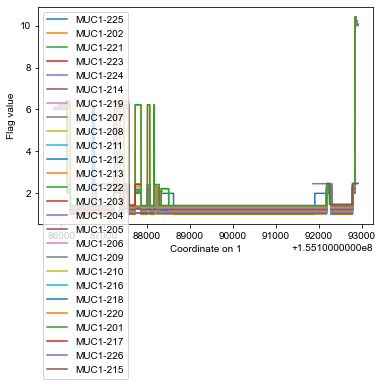

-- searching among 1 references
-- a match found in record: 1.
-- extracting transcript for gene_MUC1_id_transcript:ENST00000620103_name_MUC1-225_type_mRNA_strand_-_loc_1:155185824-155192915, size=1811
-- searching among 1 references
-- a match found in record: 1.
-- extracting transcript for gene_MUC1_id_transcript:ENST00000338684_name_MUC1-202_type_mRNA_strand_-_loc_1:155185826-155192915, size=1107
-- searching among 1 references
-- a match found in record: 1.
-- extracting transcript for gene_MUC1_id_transcript:ENST00000610359_name_MUC1-221_type_mRNA_strand_-_loc_1:155185826-155192915, size=1101
-- searching among 1 references
-- a match found in record: 1.
-- extracting transcript for gene_MUC1_id_transcript:ENST00000614519_name_MUC1-223_type_mRNA_strand_-_loc_1:155185826-155192915, size=1093
-- searching among 1 references
-- a match found in record: 1.
-- extracting transcript for gene_MUC1_id_transcript:ENST00000615517_name_MUC1-224_type_mRNA_strand_-_loc_1:155185826-155192915, 

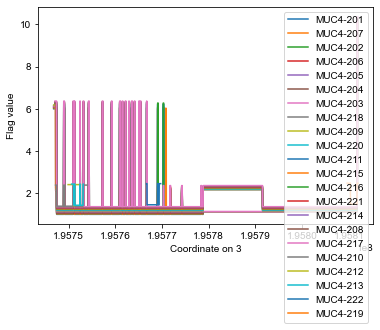

-- searching among 1 references
-- a match found in record: 3.
-- extracting transcript for gene_MUC4_id_transcript:ENST00000308466_name_MUC4-201_type_mRNA_strand_-_loc_3:195746765-195778810, size=3806
-- searching among 1 references
-- a match found in record: 3.
-- extracting transcript for gene_MUC4_id_transcript:ENST00000448861_name_MUC4-207_type_mRNA_strand_-_loc_3:195746765-195778810, size=3944
-- searching among 1 references
-- a match found in record: 3.
-- extracting transcript for gene_MUC4_id_transcript:ENST00000339251_name_MUC4-202_type_mRNA_strand_-_loc_3:195746765-195778810, size=3777
-- searching among 1 references
-- a match found in record: 3.
-- extracting transcript for gene_MUC4_id_transcript:ENST00000415455_name_MUC4-206_type_mRNA_strand_-_loc_3:195746765-195778810, size=3716
-- searching among 1 references
-- a match found in record: 3.
-- extracting transcript for gene_MUC4_id_transcript:ENST00000392407_name_MUC4-205_type_mRNA_strand_-_loc_3:195746765-195778810, 

In [41]:
# load smallest exons for given genes by sequence reader
%matplotlib inline
isoforms_dict = seq_rd.find_transcript_isoforms(gene_dicts, save=True)

In [44]:
for _isoname, _records in isoforms_dict['MUC4'].items():
    print(_isoname, len(_records[0]))


MUC4-201 3806
MUC4-207 3944
MUC4-202 3777
MUC4-206 3716
MUC4-205 3645
MUC4-204 3829
MUC4-203 3982
MUC4-218 16562
MUC4-209 16756
MUC4-220 16075
MUC4-211 16443
MUC4-215 16273
MUC4-216 16353
MUC4-221 16245
MUC4-214 16169
MUC4-208 16197
MUC4-217 16401
MUC4-210 1678
MUC4-212 2571
MUC4-213 698
MUC4-222 553
MUC4-219 925


In [48]:
print(isoforms_dict['MUC4']['MUC4-218'][0].seq)

GTCTGCTCCTCACACTGCAGCTGCTGGGCCGTGGAGCTTCCCCAGGGAGCCAGGGGGACTTTTGCCGCAGCCATGAAGGGGGCACGCTGGAGGAGGGTCCCCTGGGTGTCCCTGAGCTGCCTGTGTCTCTGCCTCCTTCCGCATGTGGTCCCAGGAACCACAGAGGACACATTAATAACTGGAAGTAAAACTGCTGCCCCAGTCACCTCAACAGGCTCAACAACAGCGACACTAGAGGGACAATCAACTGCAGCTTCTTCAAGGACCTCTAATCAGGACATATCAGCTTCATCTCAGAACCACCAGACTAAGAGCACGGAGACCACCAGCAAAGCTCAAACCGACACCCTCACGCAGATGATGACATCAACTCTTTTTTCTTCCCCAAGTGTACACAATGTGATGGAGACAGCTCCTCCAGATGAAATGACCACATCATTTCCCTCCAGTGTCACCAACACACTCATGATGACATCAAAGACTATAACAATGACAACCTCCACAGACTCCACTCTTGGAAACACAGAAGAGACATCAACAGCAGGAACTGAAAGTTCTACCCCAGTGACCTCAGCAGTCTCAATAACAGCTGGACAGGAAGGACAATCACGAACAACTTCCTGGAGGACCTCTATCCAAGACACATCAGCTTCTTCTCAGAACCACTGGACTCGGAGCACGCAGACCACCAGGGAATCTCAAACCAGCACCCTAACACACAGAACCACTTCAACTCCTTCTTTCTCTCCAAGTGTACACAATGTGACAGGGACTGTTTCTCAGAAGACATCTCCTTCAGGTGAAACAGCTACCTCATCCCTCTGTAGTGTCACAAACACATCCATGATGACATCAGAGAAGATAACAGTGACAACCTCCACAGGCTCCACTCTTGGAAACCCAGGGGAGACATCATCAGTACCTGTTACTGGAAGTCTTATGCCAGTCACCTCAGCAGCCTTAGTAACATTTGATCCAGAAGGACAATCACCAGCAACTT

In [49]:
target_seq = str(isoforms_dict['MUC4']['MUC4-218'][0].seq)

## convert to dict

In [54]:
from seqint import seq2Int,seq2Int_rc

In [144]:
pb_len = 40
pbSeq_2_count = {}
pbSeq_2_inds = {}
for _i in range(len(target_seq)-pb_len+1):
    _seq = target_seq[_i:_i+pb_len]
    if _seq not in pbSeq_2_count:
        pbSeq_2_count[_seq] = 1
        pbSeq_2_inds[_seq] = [_i]
    else:
        pbSeq_2_count[_seq] += 1
        pbSeq_2_inds[_seq].append(_i)
print(np.unique(list(pbSeq_2_count.values()), return_counts=True))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]), array([10509,  1181,   241,   109,    91,    71,    17,    18,    11,
          27,    16,    27,     2,    11,     6,    11,     2],
      dtype=int64))


In [137]:
# select targets
_overlap_th = 0
_sel_seq_dict = {}
_target_occupancy = np.zeros(len(target_seq), dtype=np.bool)
_libraryCountTable = {}
_countTable_size = 17
_count_threshold = 0

_repeat_counts = np.unique(list(pbSeq_2_count.values()))
for _count in _repeat_counts[::-1]:
    for _seq in pbSeq_2_count:
        if pbSeq_2_count[_seq] == _count:
            _seq = target_seq[pbSeq_2_inds[_seq][0]:pbSeq_2_inds[_seq][0]+pb_len]
            if _seq in _sel_seq_dict:
                continue
            _occupancies = np.array([np.sum(_target_occupancy[_i:_i+pb_len]) for _i in pbSeq_2_inds[_seq]])
            _tableCount = np.sum([_libraryCountTable.get(seq2Int(_seq[_j:_j+_countTable_size].encode()), 0) 
                                  for _j in range(len(_seq)-_countTable_size+1)])

            if (_occupancies > _overlap_th).any() or _tableCount > _count_threshold:
                continue
            else:
                _sel_seq_dict[_seq] = pbSeq_2_inds[_seq]
                for _i in pbSeq_2_inds[_seq]:
                    _target_occupancy[_i:_i+pb_len] = 1
                # add count-table
                for _j in range(len(_seq)-_countTable_size+1):
                    _int_j = seq2Int(_seq[_j:_j+_countTable_size].encode())
                    if _int_j in _libraryCountTable:
                        _libraryCountTable[_int_j] += len(pbSeq_2_inds[_seq])
                    else:
                        _libraryCountTable[_int_j] = len(pbSeq_2_inds[_seq])
                    _int_j_rc = seq2Int_rc(_seq[_j:_j+_countTable_size].encode())
                    if _int_j_rc in _libraryCountTable:
                        _libraryCountTable[_int_j_rc] += len(pbSeq_2_inds[_seq])
                    else:
                        _libraryCountTable[_int_j_rc] = len(pbSeq_2_inds[_seq])
                        
                print(len(pbSeq_2_inds[_seq]), _seq)

C:\Users\puzheng\AppData\Local\Temp/ipykernel_37172/167572977.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  _target_occupancy = np.zeros(len(target_seq), dtype=np.bool)


17 CCACCCCTCTTCCTGTCACCGACACTTCCTCAGCATCCAC
16 CTCTTCCTGTCACCAGCCTTTCCTCAGTATCCACAGGTGA
11 GCCTCTTCCTGTCACTAGCCCTTCCTCAGCATCCACAGGT
6 TCTTCCTGTCACCGACGCTTCCTCAGTGTCCACAGGTCAC
5 ATCCACAGGTCACGCCACCCCTCTTCATGTCACCAGCCCT
3 CTCAGCATCCACAGGTGACACCACCTCTCTTCCTGTCACC
2 TCCTCAGTGTCCACAGATCACGCCACCTCTCTTCCTGTAA
2 CTCAGCATCCACAGGTCACGTCACTCCTCTTCATGTCACC
2 CTTCCTGTCACCGACGTTTCCTCGGCATCCACAGGTCAGG
2 TCTTCCTGTCACCGGCCTTTCCTCAGCTTCCACAGGTGAC
2 CACAGGTGACACCACCCCTCTTCTTGTCACCGAGACTTCC
2 CTCTTCCTGTCACCATCCCTTCCTCAGCATCCTCAGGTCA
2 TCCTCAGCATCCACCGGTCACGCCACCCCGCTTCCTGTCA
2 GGTCACGCCACCCCTGTTCCTGTCACCAGCACTTCCTCAG
2 AGGTGACACCACCCGTCTTCCTGTCACGGACACTTCCTCA
1 GTCTGCTCCTCACACTGCAGCTGCTGGGCCGTGGAGCTTC
1 CCCAGGGAGCCAGGGGGACTTTTGCCGCAGCCATGAAGGG
1 GGCACGCTGGAGGAGGGTCCCCTGGGTGTCCCTGAGCTGC
1 CTGTGTCTCTGCCTCCTTCCGCATGTGGTCCCAGGAACCA
1 CAGAGGACACATTAATAACTGGAAGTAAAACTGCTGCCCC
1 AGTCACCTCAACAGGCTCAACAACAGCGACACTAGAGGGA
1 CAATCAACTGCAGCTTCTTCAAGGACCTCTAATCAGGACA
1 TATCAGCTTCATCTCAGAACCACCAGACTAAGAGCACGGA
1 GACCAC

### select top probes

In [142]:
num_pb = 5
final_sel_sequences = []
for _i, (_seq, _inds) in enumerate(_sel_seq_dict.items()):
    print(_seq, len(_inds))
    final_sel_sequences.append(_seq)
    if len(final_sel_sequences) >= num_pb:
        break

CCACCCCTCTTCCTGTCACCGACACTTCCTCAGCATCCAC 17
CTCTTCCTGTCACCAGCCTTTCCTCAGTATCCACAGGTGA 16
GCCTCTTCCTGTCACTAGCCCTTCCTCAGCATCCACAGGT 11
TCTTCCTGTCACCGACGCTTCCTCAGTGTCCACAGGTCAC 6
ATCCACAGGTCACGCCACCCCTCTTCATGTCACCAGCCCT 5
